## 1. Import the necessary analysis and visualization libraries, then import your most up-to-date project data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import file
path = r'/Users/jorisjan/Documents/CareerFoundry/Instacart Basket Analysis'
df_orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## 2. follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

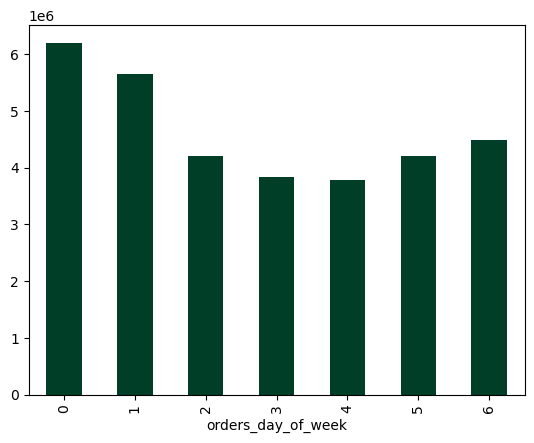

In [3]:
purple_bar = df_orders_products_all['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['#003E28'])

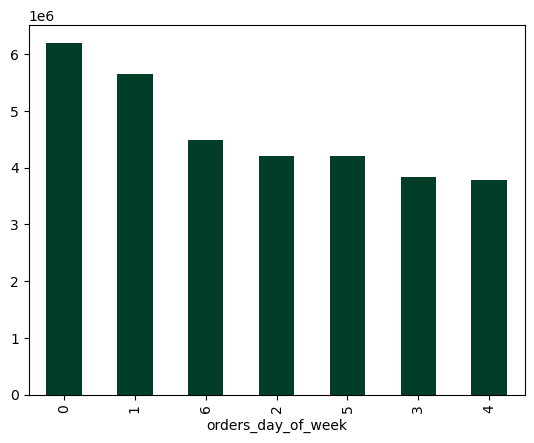

In [4]:
rainbow_bar = df_orders_products_all['orders_day_of_week'].value_counts().plot.bar(color =['#003E28'])

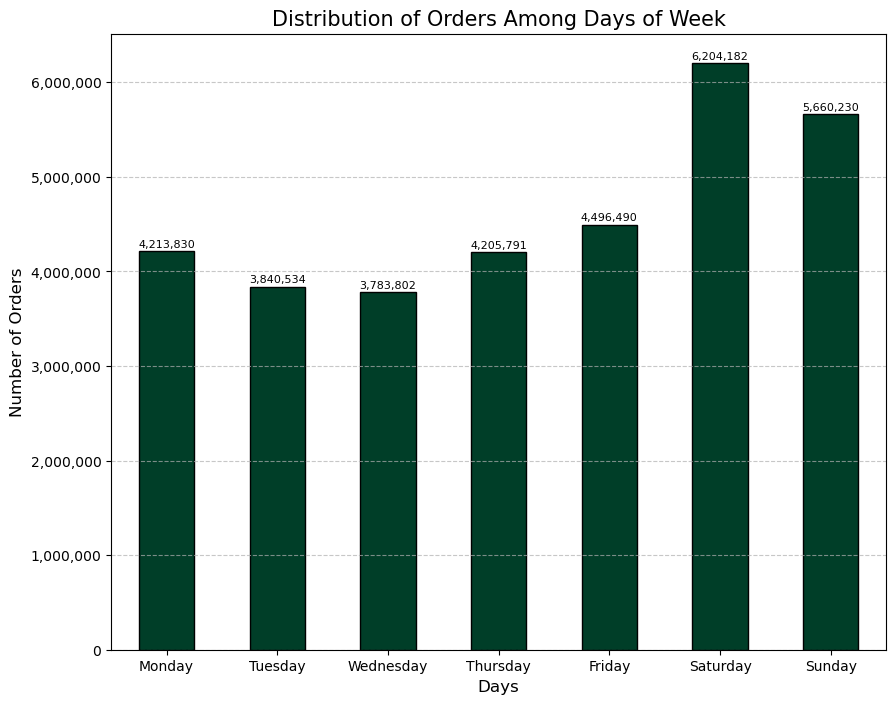

In [7]:
# Create a bar chart with enhanced visual features
# Mapping of day numbers to day names
day_of_week_map = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Get the count of orders for each day, ensuring all days are represented
orders_day_of_week_counts = df_orders_products_all['orders_day_of_week'].value_counts().reindex(range(7))

# Sort the index as per the desired day order and map the index to day names
orders_day_of_week_sorted = orders_day_of_week_counts.reindex([2, 3, 4, 5, 6, 0, 1]).rename(index=day_of_week_map)

# Create the bar chart
plt.figure(figsize=(10, 8))
bar_orders_day_of_week = orders_day_of_week_sorted.plot.bar(color='#003E28', edgecolor='black')

plt.title('Distribution of Orders Among Days of Week', fontsize=15)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bar_orders_day_of_week.patches:
    height = bar.get_height()
    label = '{:,}'.format(int(height))
    plt.annotate(label, 
                 (bar.get_x() + bar.get_width() / 2, height), 
                 ha='center', va='center',
                 xytext=(0, 5), textcoords='offset points', fontsize=8)

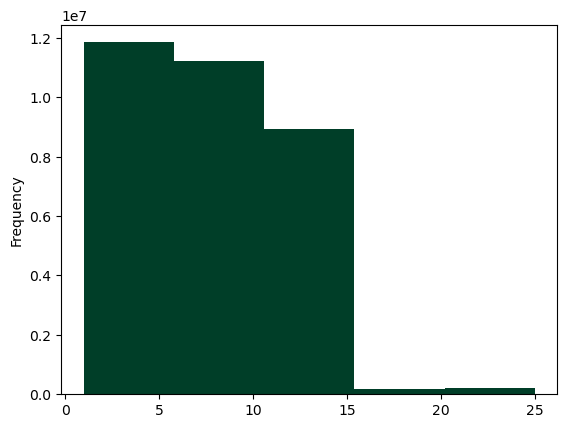

In [93]:
purple_hist = df_orders_products_all['prices'].plot.hist(bins = 5, color = ['#003E28'])

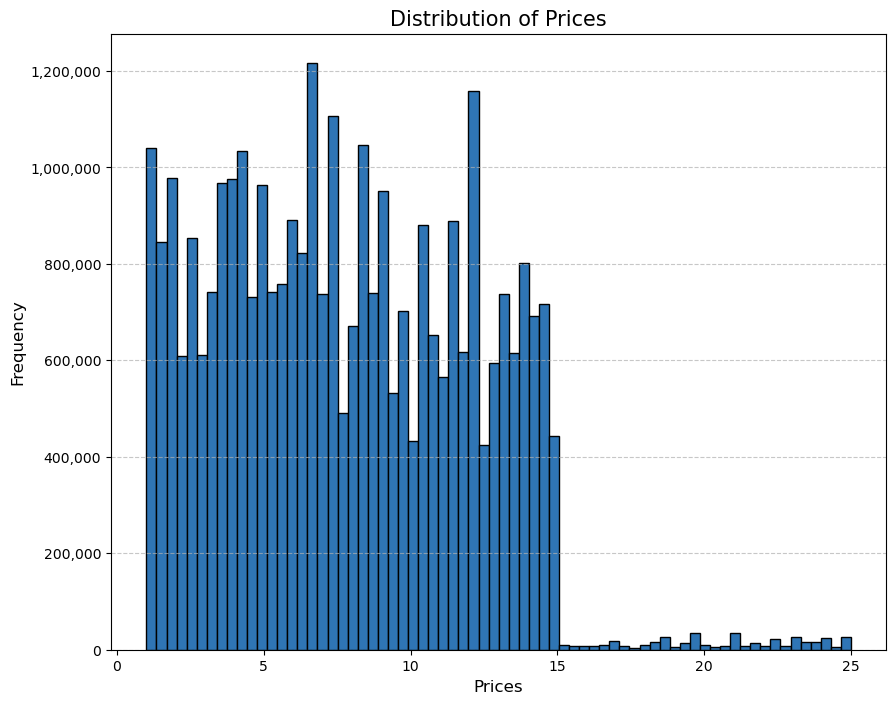

<Figure size 640x480 with 0 Axes>

In [9]:
# Create a histogram with enhanced visual features.
plt.figure(figsize=(10, 8))
hist_prices = plt.hist(df_orders_products_all['prices'], bins=70, color='#2F75B5', edgecolor='black')
plt.title('Distribution of Prices', fontsize=15)
plt.xlabel('Prices', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.grid(axis='y', linestyle='--', alpha=0.7)

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png')
plt.savefig(output_path, format='png', dpi=300)
plt.show()
plt.clf()

In [10]:
# creating a sample
np.random.seed(4)
dev = np.random.rand(len(df_orders_products_all)) <= 0.7

In [11]:
# split df_ords_prods_merge into two samples:
big = df_orders_products_all[dev]
small = df_orders_products_all[~dev]

In [12]:
# reduce sample to only the columns necessary
df_reduced = small[['orders_day_of_week','prices','loyalty_flag']]

/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


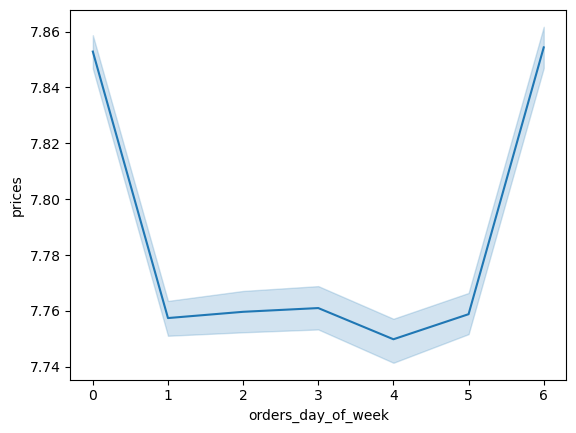

In [13]:
# Line Chart
line = sns.lineplot(data = df_reduced, x = 'orders_day_of_week',y = 'prices')

/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


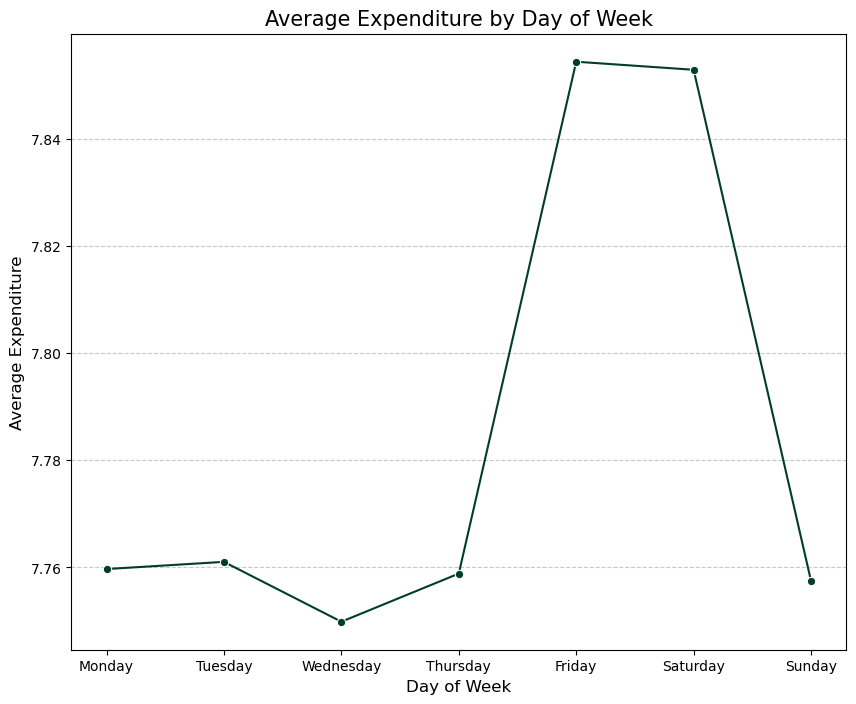

In [14]:
# Assuming 'df_reduced' has a column 'orders_day_of_week' and 'prices' which represents the expenditure
# First, group by 'orders_day_of_week' and calculate the mean expenditure
avg_expenditure_by_day = df_reduced.groupby('orders_day_of_week')['prices'].mean()

# Sort the index as per the desired day order and map the index to day names
sorted_days = [2, 3, 4, 5, 6, 0, 1]
avg_expenditure_by_day_sorted = avg_expenditure_by_day.loc[sorted_days].rename(index=day_of_week_map)

# Create a histogram with enhanced visual features.
plt.figure(figsize=(10, 8))
line_expenditure_day = sns.lineplot(data=avg_expenditure_by_day_sorted, marker='o', color='#003E28')

plt.title('Average Expenditure by Day of Week', fontsize=15)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Expenditure', fontsize=12)
plt.xticks(ticks=np.arange(len(sorted_days)), labels=[day_of_week_map[i] for i in sorted_days], rotation=0)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## 3. Create a histogram of the “order_hour_of_day” column.

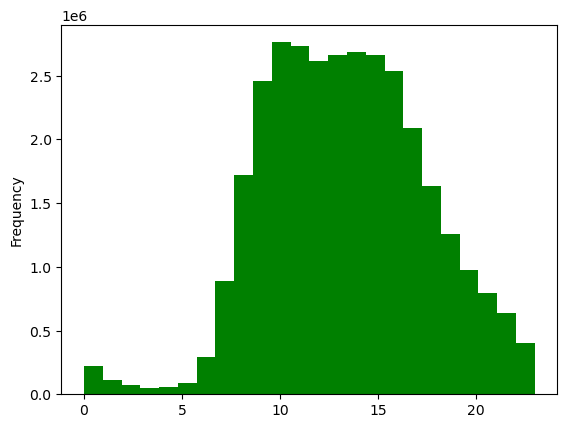

In [15]:
hist_order_hour_of_day = df_orders_products_all['order_hour_of_day'].plot.hist(bins = 24, color = ['green'])

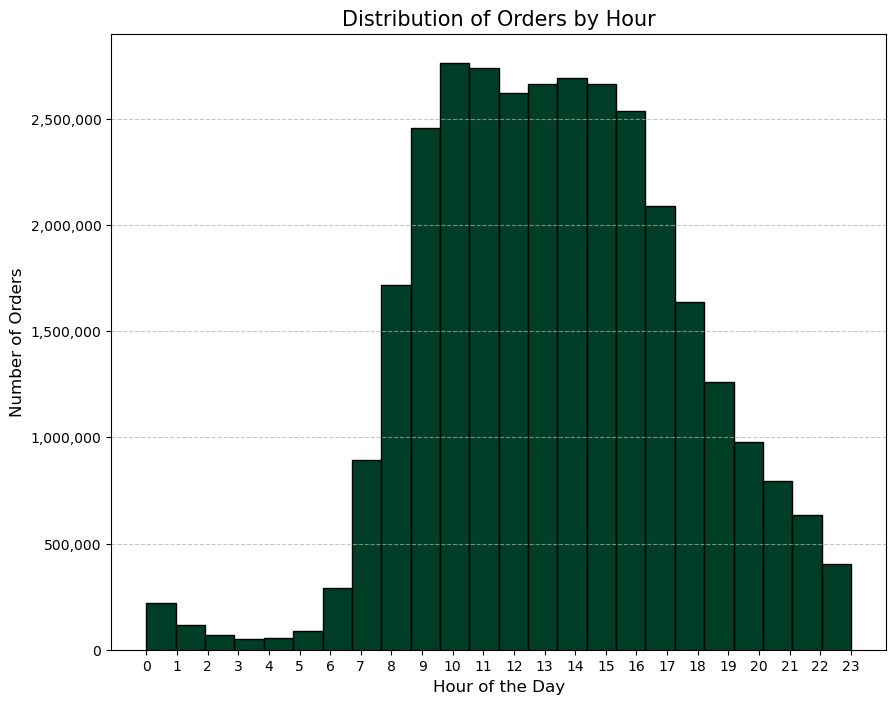

<Figure size 640x480 with 0 Axes>

In [6]:
# Create a histogram with enhanced visual features.
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return '{:,}'.format(int(x))
plt.figure(figsize=(10, 8))
hist_order_hour_of_day = plt.hist(df_orders_products_all['order_hour_of_day'], bins=24, color='#003E28', edgecolor='black')
plt.title('Distribution of Orders by Hour', fontsize=15)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.grid(axis='y', linestyle='--', alpha=0.7)

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png')
plt.savefig(output_path, format='png', dpi=300)
plt.show()
plt.clf()

The "Distribution of Orders by Hour" histogram displays the number of orders placed during each hour of a 24-hour day. It shows that:

- The number of orders starts very low in the early morning hours (from midnight to 7am approximately)
- There is a steady increase in the number of orders from the early morning (between 7am and 10am)
- The peack is between 10am and 3pm
- The number of orders then gradually decreases through the afternoon and evening

This pattern suggests that most of the orders are placed during the middle of the day. This information could be used to optimize delivery schedules, staffing, and targeted marketing efforts during peak times.

## 4.  Create a bar chart from the “loyalty_flag” column.

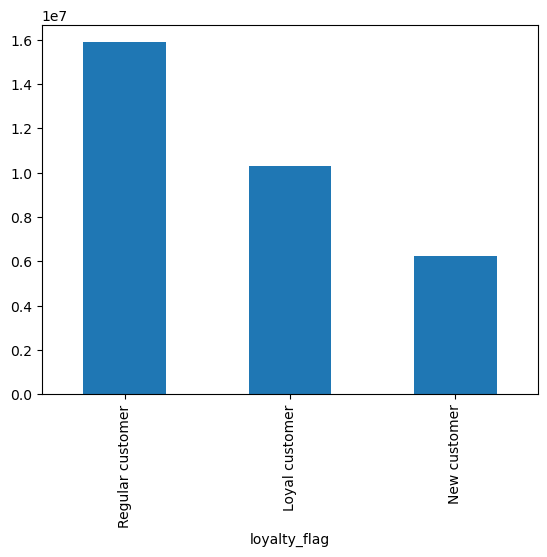

In [16]:
bar_loyalty_flag = df_orders_products_all['loyalty_flag'].value_counts().plot.bar()

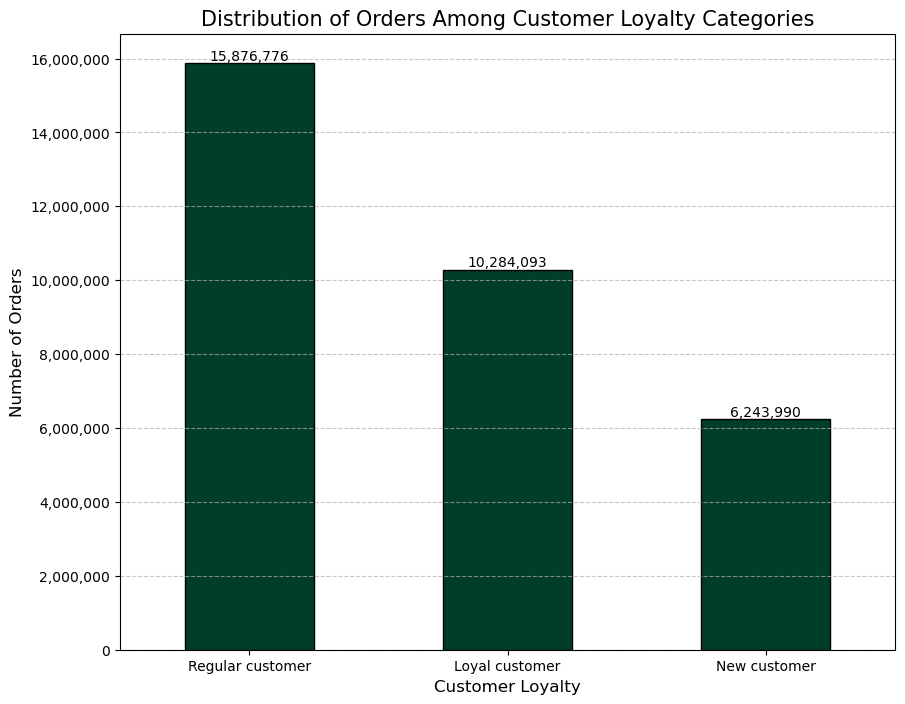

In [17]:
# Create a bar chart with enhanced visual features
plt.figure(figsize=(10, 8))
bar_loyalty_flag = df_orders_products_all['loyalty_flag'].value_counts().plot.bar(color='#003E28', edgecolor='black')

plt.title('Distribution of Orders Among Customer Loyalty Categories', fontsize=15)
plt.xlabel('Customer Loyalty', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bar_loyalty_flag.patches:
    height = bar.get_height()
    label = '{:,}'.format(int(height))  # Format the number with commas
    plt.annotate(label, 
                 (bar.get_x() + bar.get_width() / 2, height), 
                 ha='center', va='center',
                 xytext=(0, 5), textcoords='offset points', fontsize=10)

The "Distribution of Orders Among Customer Loyalty Categories" bar chart illustrates the number of orders placed by customers of different loyalty levels. It shows that:

- "Regular customers" place the most orders, followed by "Loyal customers," and "New customers" place the fewest.

- The number of orders from "Regular customers" is the highest, which suggests that while they may not place orders as frequently as "Loyal customers," they represent a significant portion of the total orders
- "Loyal customers" also contribute a substantial number of orders, indicating a smaller but potentially more consistent customer base
- "New customers" represent the smallest group in terms of order numbers, which could be expected as they are either first-time or infrequent users of the service.

Understanding the distribution of orders across these loyalty categories can help Instacart in tailoring customer retention strategies, personalizing marketing campaigns, and allocating resources efficiently to nurture new customers into becoming regular or loyal ones.

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

### Create an accurate sample for the line chart

In [18]:
# Sample already created earlier.

# Reduce sample to only the columns necessary
df_expenditure = small[['order_hour_of_day','prices']]

### Create the line chart

/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


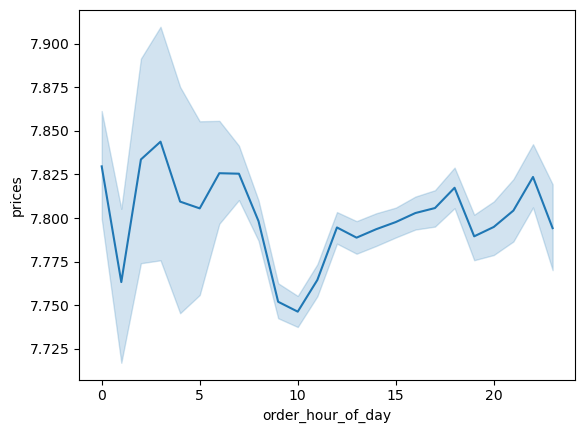

In [19]:
# Line Chart
line = sns.lineplot(data = df_expenditure, x = 'order_hour_of_day',y = 'prices')

/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([7.7  , 7.725, 7.75 , 7.775, 7.8  , 7.825, 7.85 , 7.875, 7.9  ,
        7.925]),
 [Text(0, 7.7, '7.700'),
  Text(0, 7.7250000000000005, '7.725'),
  Text(0, 7.75, '7.750'),
  Text(0, 7.775, '7.775'),
  Text(0, 7.8, '7.800'),
  Text(0, 7.825, '7.825'),
  Text(0, 7.8500000000000005, '7.850'),
  Text(0, 7.875, '7.875'),
  Text(0, 7.9, '7.900'),
  Text(0, 7.925, '7.925')])

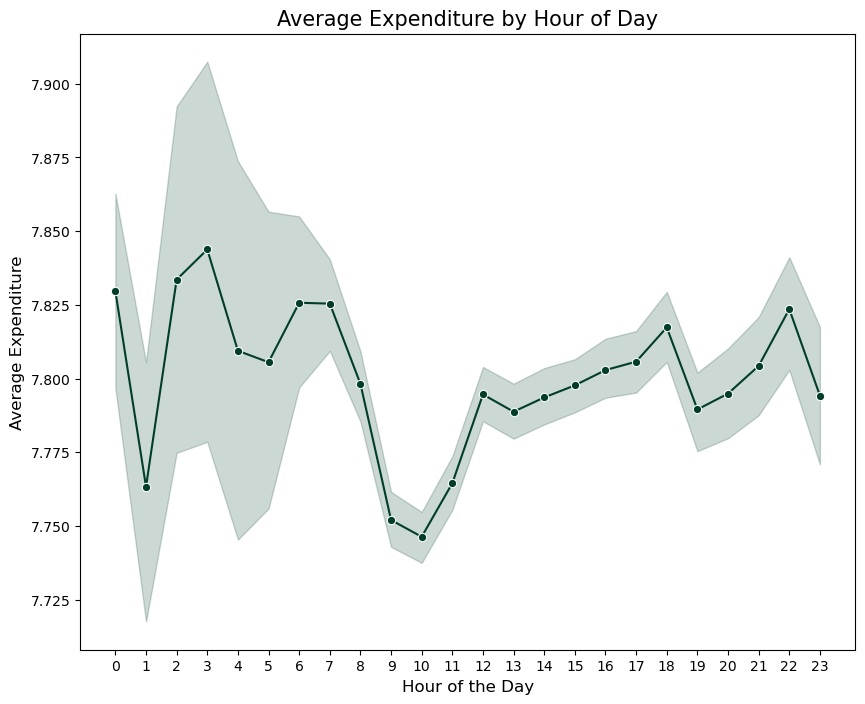

In [20]:
plt.figure(figsize=(10, 8))
line_expenditure_hour = sns.lineplot(data=df_expenditure, x='order_hour_of_day', y='prices', color='#003E28', marker='o')

plt.title('Average Expenditure by Hour of Day', fontsize=15)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Expenditure', fontsize=12)
plt.xticks(np.arange(0, 24, 1), fontsize=10)
plt.yticks(fontsize=10)

- There is variability in the average expenditure throughout the day
- There is a noticeable fluctuation in expenditure in the early hours (between midnight and 6am), which may be due to fewer transactions but with larger basket sizes, leading to greater variance
- From around 6am to 10am, there seems to be a decrease in the average expenditure
- After 10 AM, the average expenditure begins to increase again and fluctuate more regularly
- The average expenditure does not appear to have a clear upward or downward trend during the day, but instead, it fluctuates within a relatively narrow range

This chart can help understand when customers are likely to spend more on average, which could inform decisions about targeted marketing, promotions, and potentially staffing needs if linked to order processing times

## 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

### Create an accurate sample for the line chart

In [21]:
# Sample already created earlier.

# Reduce sample to only the columns necessary
df_age_dependents = small[['age','number_of_dependents']]

### Create the line chart

/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 ]),
 [Text(0, 1.4000000000000001, '1.40'),
  Text(0, 1.4200000000000002, '1.42'),
  Text(0, 1.4400000000000002, '1.44'),
  Text(0, 1.4600000000000002, '1.46'),
  Text(0, 1.4800000000000002, '1.48'),
  Text(0, 1.5000000000000002, '1.50'),
  Text(0, 1.52, '1.52'),
  Text(0, 1.54, '1.54'),
  Text(0, 1.56, '1.56'),
  Text(0, 1.58, '1.58'),
  Text(0, 1.6, '1.60')])

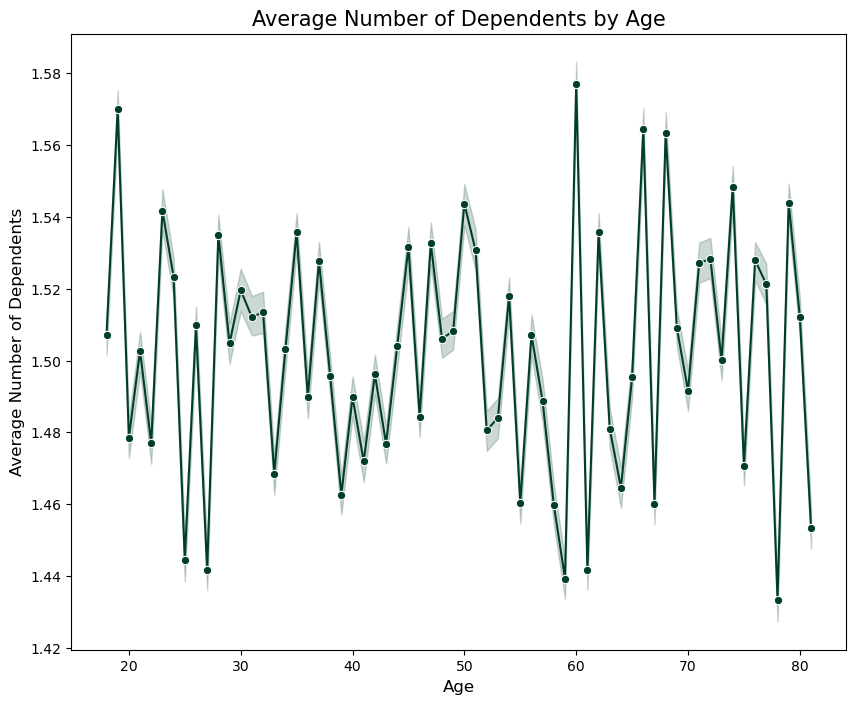

In [22]:
# Line Chart
plt.figure(figsize=(10, 8))
line_age_dependents = sns.lineplot(data = df_age_dependents, x='age', y='number_of_dependents', color='#003E28', marker='o')

plt.title('Average Number of Dependents by Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Number of Dependents', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

- There is no clear linear relationship or trend that indicates that age has a direct correlation with the number of dependents; instead, the number of dependents seems to vary significantly across different ages
- The line chart shows a relatively narrow range of average dependents, between approximately 1.44 and 1.58, suggesting that while there are fluctuations, the variations are not extreme

This information could be useful for segmenting customers based on family needs, which could affect purchasing patterns. However, the variations and the width of the confidence intervals suggest that age alone may not be a strong predictor of the number of dependents, and it might be influenced by other factors not captured in this analysis.

## 7. Create a scatterplot using the sns.scatterplot() function to explore whether there’s a connection between age and spending power (income).

### Create an accurate sample for the scatterplot chart

In [23]:
# Sample already created earlier.

# Reduce sample to only the columns necessary
df_age_income = small[['age','income']]

### Create the scatterplot

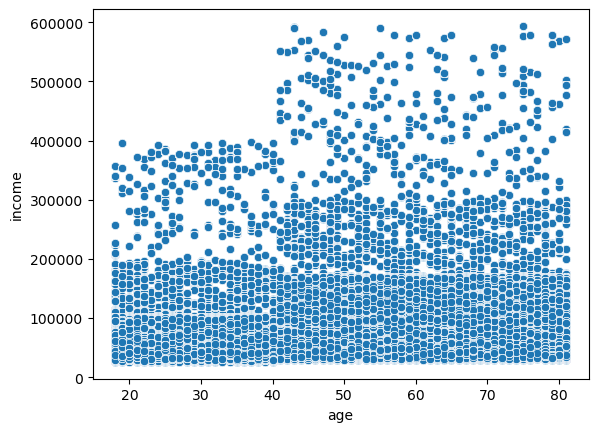

In [24]:
scp_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_age_income)

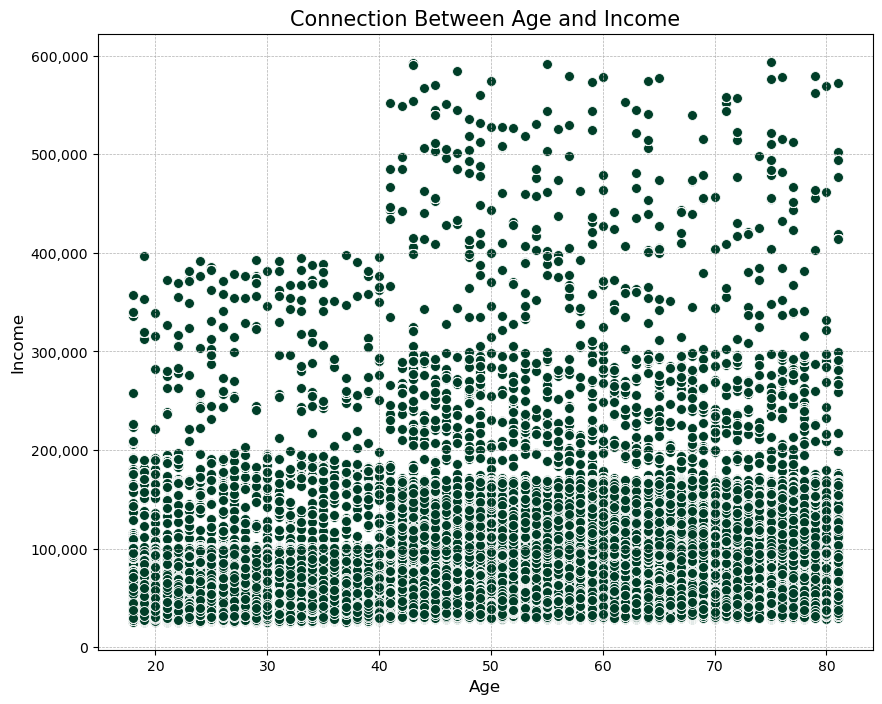

In [25]:
# Create a bar chart with enhanced visual features
plt.figure(figsize=(10, 8))
scp_age_income = sns.scatterplot(x='age', y='income', data = df_age_income, color='#003E28', edgecolor='white', s=50)
plt.title('Connection Between Age and Income', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

- The data points are spread across all ages, suggesting that the dataset includes a wide range of ages
- Income levels are also varied, with a wide range of values at almost every age
- Until age 40, income exceed 400,000, which then spreads out to 600,000. This could suggest that income tends to increase with age
- There is significant variance in income within age groups, as indicated by the vertical spread of data points at each age level
- The plot does not show a clear or strong correlation between age and income, as there is no distinct trend or pattern that suggests a consistent increase or decrease in income as age progresses.

The high variance within age groups and the lack of a clear trend suggest that age may not be a strong predictor of income on its own. Other factors, possibly including profession, education, and geographic location, might also play significant roles in determining income levels.

## 8. Export the visualizations as “.png” files in the 'Visualizations' project folder.

In [87]:
# Exporting charts
bar_orders_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week.png'))
line_expenditure_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure_day.png'))
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))
line_expenditure_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure_hour.png'))
line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))
scp_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scp_age_income.png'))